### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [190]:
data = pd.read_csv('data/coupons.csv')

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [194]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [196]:
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].value_counts(dropna=False))  # Includes NaN counts
    print("\n" + "-"*40 + "\n")

Column: destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

----------------------------------------

Column: passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

----------------------------------------

Column: weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

----------------------------------------

Column: temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

----------------------------------------

Column: time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

----------------------------------------

Column: coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

-----------------------------------

In [198]:
#direction_same and direction_opp are almost replicate values of each other. So dropping direction_opp column
#Column car has 12576 that is 95% Nan values. So dropping that column as well
#Column toCoupon_GEQ5min has value 1 for rows. So it is not adding any value to analytics. Dropping that column as well

data.drop(columns=["car", "direction_same", "toCoupon_GEQ5min"], inplace=True)



In [200]:
# Columns Bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20To50 has few NAN values. Lets fill them with value "Never"
# Fill missing values in categorical columns with "never"
fill_cols = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
data[fill_cols] = data[fill_cols].fillna("never")

In [202]:
#checking columns value_counts again
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].value_counts(dropna=False))  # Includes NaN counts
    print("\n" + "-"*40 + "\n")

Column: destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

----------------------------------------

Column: passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

----------------------------------------

Column: weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

----------------------------------------

Column: temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

----------------------------------------

Column: time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

----------------------------------------

Column: coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

-----------------------------------

In [84]:
## Standardize column values ##
#Coupon column
data["coupon"] = data["coupon"].replace({
    "Coffee House": "CoffeeHouse",
    "Restaurant(<20)": "RestaurantLessThan20",
    "Carry out & Take away": "CarryAway",
    "Restaurant(20-50)": "Restaurant20-50"
})

#income- Converting range into midpoints
income_map = {
    "$25000 - $37499": 31250,
    "$12500 - $24999": 18750,
    "$37500 - $49999": 43750,
    "$100000 or More": 100000,
    "$50000 - $62499": 56250,
    "Less than $12500": 6250,
    "$87500 - $99999": 93750,
    "$75000 - $87499": 81250,
    "$62500 - $74999": 68750
}
data["income"] = data["income"].replace(income_map)

#Education 
data["education"] = data["education"].replace({
    "Graduate degree (Masters or Doctorate)": "Graduate degree",
    "Some college - no degree": "Some College"
})

#Occupation 
data["occupation"] = data["occupation"].replace({
    "Healthcare Practitioners & Technical": "Healthcare",
    "Healthcare Support": "Healthcare",
    "Education&Training&Library": "Education"})

# Standardize age values
data["age"] = data["age"].replace({
    "below21": "<21",
    "50plus": ">50"
})

# Standardize age values
data["age"] = data["age"].replace({
    "below21": "<21",
    "50plus": ">50"
})


data["maritalStatus"] = data["maritalStatus"].replace({
    "Unmarried partner": "Single"
})

#checking columns value_counts again
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].value_counts(dropna=False))  # Includes NaN counts
    print("\n" + "-"*40 + "\n")

Column: destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

----------------------------------------

Column: passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

----------------------------------------

Column: weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

----------------------------------------

Column: temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

----------------------------------------

Column: time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

----------------------------------------

Column: coupon
coupon
CoffeeHouse             3996
RestaurantLessThan20    2786
CarryAway               2393
Bar                     2017
Restaurant20-50         1492
Name: count, dtype: int64

----------------------------------------

4. What proportion of the total observations chose to accept the coupon?



In [204]:
accepted_coupon = data["Y"].sum()
total_observations = len(data)
print(accepted_coupon)
print(total_observations)
proportion_accepting = accepted_coupon/total_observations
print(proportion_accepting)

7210
12684
0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

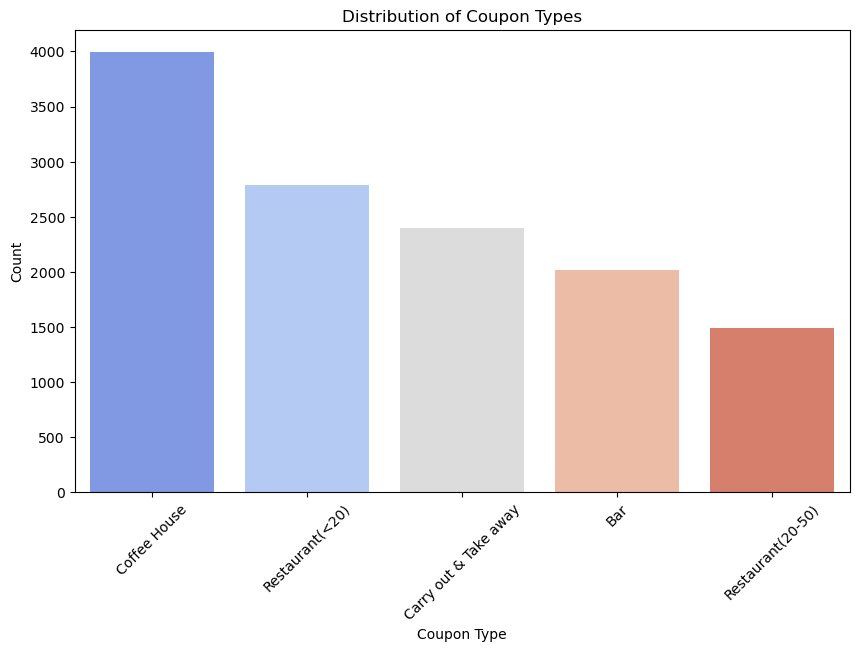

In [212]:
plt.figure(figsize=(10, 6))

sns.countplot(data = data, x = "coupon", order = data["coupon"].value_counts().index, palette ="coolwarm")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Distribution of Coupon Types")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.savefig("images/bar_coupons.png")
plt.show()



6. Use a histogram to visualize the temperature column.

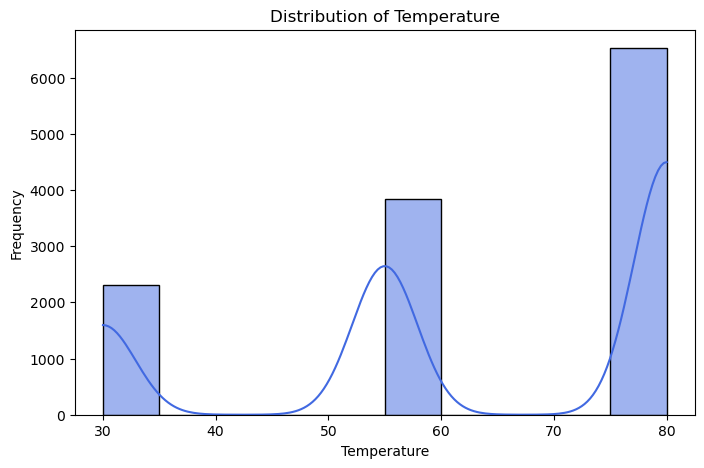

In [214]:
plt.figure(figsize=(8,5))
sns.histplot(data["temperature"], bins =10, kde= True ,color = "royalblue")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")
plt.savefig("images/temp_distribution.png")

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
bar_coupons = data[data["coupon"] == "Bar"]
bar_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   int64 
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [96]:
accepted_bar_coupons = bar_coupons["Y"].sum()
total_observations_bar = len(bar_coupons)
proportion_accepting_bar = accepted_bar_coupons/total_observations_bar
print(proportion_accepting_bar)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


bar_visit_category
3 or fewer     0.527404
More than 3    0.301905
Name: Y, dtype: float64


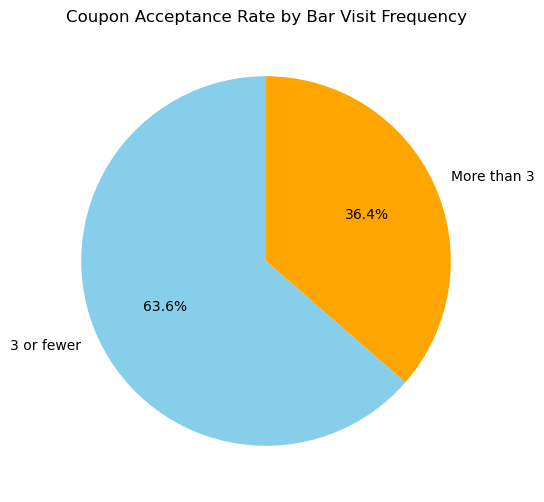

In [216]:
# Define categories
bar_coupons = bar_coupons.dropna(subset=["Bar"])
bar_coupons["bar_visit_category"] = bar_coupons["Bar"].apply(
    lambda x: "3 or fewer" if x in ["less1", "1~3"] else "More than 3"
)

# Calculate acceptance rate for each group
acceptance_rate = bar_coupons.groupby("bar_visit_category")["Y"].mean()

# Display results
print(acceptance_rate)

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(acceptance_rate.values, labels=acceptance_rate.index, autopct='%1.1f%%', colors=["skyblue", "orange"], startangle=90)
plt.title("Coupon Acceptance Rate by Bar Visit Frequency")
plt.savefig("images/bar_coupons_visit_frequency.png")
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


driver_category
All Others            0.335003
Frequent & Over 25    0.695238
Name: Y, dtype: float64


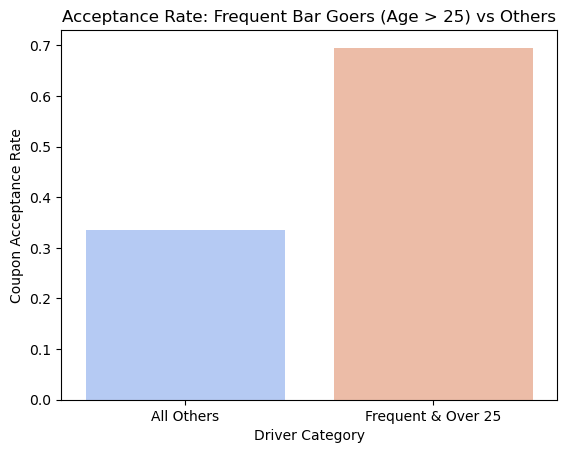

In [218]:
#Fix age column to be numeric and replace 50 plus with 51 and below21 with 20
# Convert age column to numeric
bar_coupons["age"] = pd.to_numeric(bar_coupons["age"].replace({"50plus": "51", "below21": "20", ">50": "52", "<21":"19"}))

# Define condition for "Frequent Bar Goers & Over 25"
condition = (bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])) & (bar_coupons["age"] > 25)

# Create a new column to categorize users
bar_coupons["driver_category"] = condition.map({True: "Frequent & Over 25", False: "All Others"})

# Calculate acceptance rate
acceptance_rate_comparison = bar_coupons.groupby("driver_category")["Y"].mean()

# Display results
print(acceptance_rate_comparison)


acceptance_rate_df = acceptance_rate_comparison.reset_index()

# Plot bar chart
sns.barplot(x="driver_category", y="Y", data=acceptance_rate_df, palette="coolwarm")
plt.ylabel("Coupon Acceptance Rate")
plt.xlabel("Driver Category")
plt.title("Acceptance Rate: Frequent Bar Goers (Age > 25) vs Others")
plt.savefig("images/bar_coupons_frequennt_bar_goers.png")
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


driver_category
All Others                          0.296044
Frequent & No Kids & Non-Farming    0.713249
Name: Y, dtype: float64


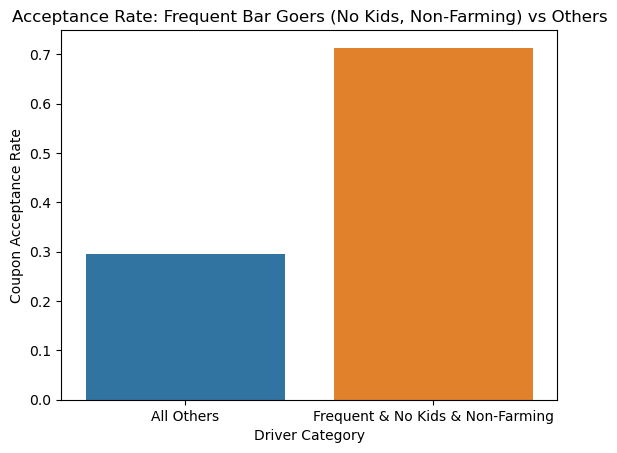

In [220]:
# Define condition for "Frequent Bar Goers, No Kid Passengers, & Non-Farming Occupation"
condition = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &  # More than once a month
    (bar_coupons["passanger"] != "Kid(s)") &  # Passengers NOT kids
    (bar_coupons["occupation"] != "Farming Fishing & Forestry")  # Exclude specific occupation
)

# Categorize into two groups
bar_coupons["driver_category"] = condition.map({True: "Frequent & No Kids & Non-Farming", False: "All Others"})

# Calculate acceptance rate
acceptance_rate_comparison = bar_coupons.groupby("driver_category")["Y"].mean()

# Display results
print(acceptance_rate_comparison)

acceptance_rate_df = acceptance_rate_comparison.reset_index()

# Plot bar chart
sns.barplot(x="driver_category", y="Y", data=acceptance_rate_df)
plt.ylabel("Coupon Acceptance Rate")
plt.xlabel("Driver Category")
plt.title("Acceptance Rate: Frequent Bar Goers (No Kids, Non-Farming) vs Others")
plt.savefig("images/bar_coupons_frequent_bar_goers_nokids_noFarming.png")
plt.show()



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



group
Frequent Bar, No Kids, Not Widowed    0.702326
Frequent Bar, Under 30                0.721739
Others                                0.293068
Name: Y, dtype: float64


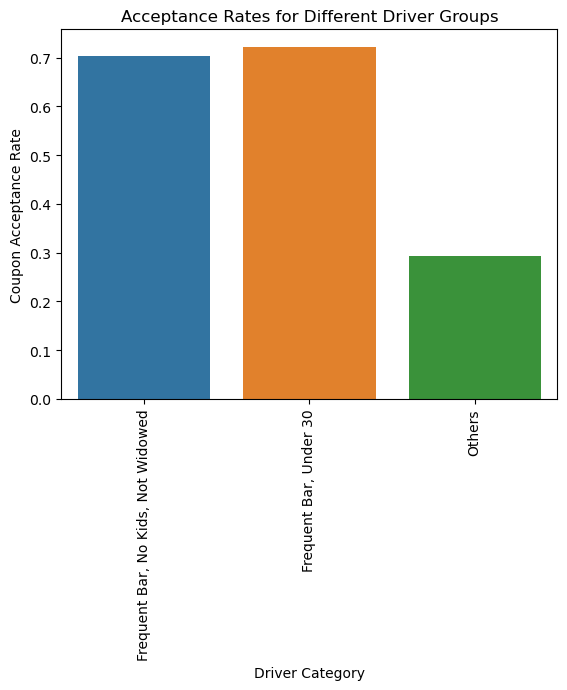

In [222]:
bar_coupons["RestaurantLessThan20"].value_counts()
#Define condition for "go to bars more than once a month, had passengers that were not a kid, and were not widowed"
condition1 = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &  # More than once a month
    (bar_coupons["passanger"] != "Kid(s)") &  # Passengers NOT kids
    (bar_coupons["maritalStatus"] != "Widowed")   # not widowed
)

# Define condition for "go to bars more than once a month and are under the age of 30"
condition2 = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"]) &  # More than once a month
    (bar_coupons["age"] < 30)   # under the age of 30
)

# Define condition for "cheap restaurants more than 4 times a month and income is less than 50K."
condition3 = (
   bar_coupons["RestaurantLessThan20"].isin(["4~8", "gt8"]) &  # Cheap restaurants more than 4 times a month
    (bar_coupons["income"].isin(["Less than $12500","$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))   # income is less than 50K
)

# Categorize into two groups
# Assign categories based on conditions
bar_coupons["group"] = "Others"  # Default category
bar_coupons.loc[condition1, "group"] = "Frequent Bar, No Kids, Not Widowed"
bar_coupons.loc[condition2, "group"] = "Frequent Bar, Under 30"
bar_coupons.loc[condition3, "group"] = "Cheap Restaurant >4x, Income <50K"

# Calculate acceptance rate
acceptance_rate_comparison = bar_coupons.groupby("group")["Y"].mean()

print(acceptance_rate_comparison)

acceptance_rate_df = acceptance_rate_comparison.reset_index()

# Plot bar chart
sns.barplot(x="group", y="Y", data=acceptance_rate_df)
plt.ylabel("Coupon Acceptance Rate")
plt.xlabel("Driver Category")
plt.title("Acceptance Rates for Different Driver Groups")
plt.xticks(rotation=90)
plt.savefig("images/different_drivers_acceptance_rates.png")
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis on Drivers Who Accepted Bar Coupons ###
Based on the observations from the acceptance rate analysis, we can hypothesize the following about drivers who accepted bar coupons:

1. **Frequent Bar-Goers Are More Likely to Accept Coupons**
Drivers who visit bars more than once a month show higher acceptance rates for bar coupons.
This suggests that people who frequent bars are more open to trying new offers at bars.

2. **Age Plays a Role**
Younger drivers (under 30) who go to bars often are more likely to accept bar coupons.
Younger individuals might be more interested in social outings, discounts, and trying new places.

3. **Companionship Matters**
Drivers who did not have kids as passengers were more likely to accept coupons.
This suggests that people who go to bars with friends, partners, or alone are more receptive to promotions.

4. **Income and Spending Habits**
Drivers who frequent inexpensive restaurants and earn less than $50K also had a relatively high acceptance rate.
This might indicate that cost-conscious individuals are more price-sensitive and likely to use discounts.

**Possible Business Implications**

*Target Promotions*: Bar coupons should be advertised to younger and frequent bar visitors.

*Social Proof Marketing*: Ads showing groups of friends enjoying bar offers might be more effective.

*Loyalty Programs*: Since these drivers already go to bars, a reward system could increase customer retention.

*Cross-Promotions*: Restaurants with cheap food could bundle bar discounts for more traction.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [224]:
#I want to find out based on the destination whether peoplpe accept the coupons
data["destination"].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

destination
Home               0.506333
No Urgent Place    0.633774
Work               0.502212
Name: Y, dtype: float64


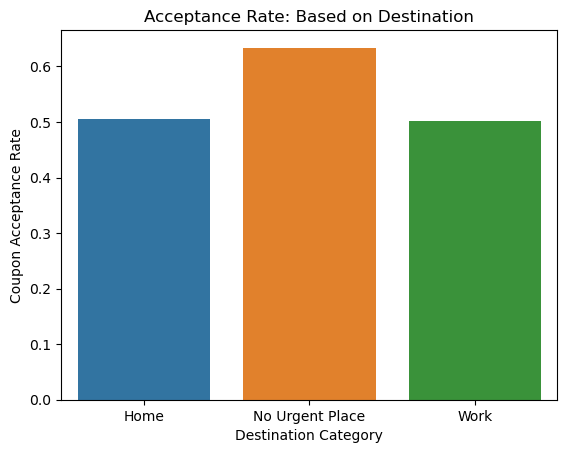

In [226]:
# Calculate acceptance rate
destination_acceptance_rate_comparison = data.groupby("destination")["Y"].mean()

# Display results
print(destination_acceptance_rate_comparison)

destination_acceptance_rate_df = destination_acceptance_rate_comparison.reset_index()

# Plot bar chart
sns.barplot(x="destination", y="Y", data=destination_acceptance_rate_df)
plt.ylabel("Coupon Acceptance Rate")
plt.xlabel("Destination Category")
plt.title("Acceptance Rate: Based on Destination")
plt.savefig("images/different_destination_acceptance_rates.png")
plt.show()



### Conclustion is no urgent place is possibly accepting coupon than people who are commuting to work ###

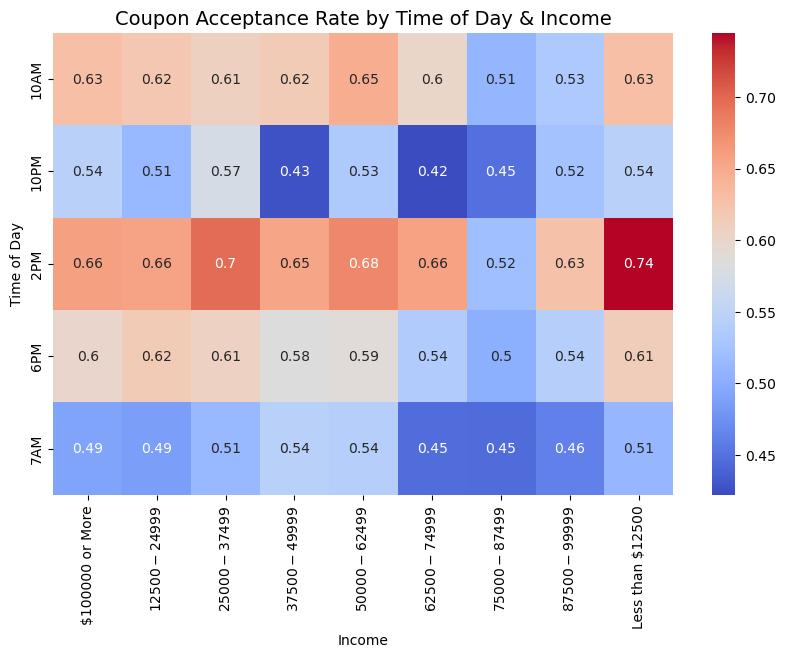

In [228]:
#Heatmap: Acceptance Rate by Time & Income
plt.figure(figsize=(10,6))
sns.heatmap(data.pivot_table(values="Y", index="time", columns="income", aggfunc="mean"), annot=True, cmap="coolwarm")
plt.title("Coupon Acceptance Rate by Time of Day & Income", fontsize=14)
plt.xlabel("Income")
plt.ylabel("Time of Day")
plt.savefig("images/income_tine_acceptance_rates.png")
plt.show()



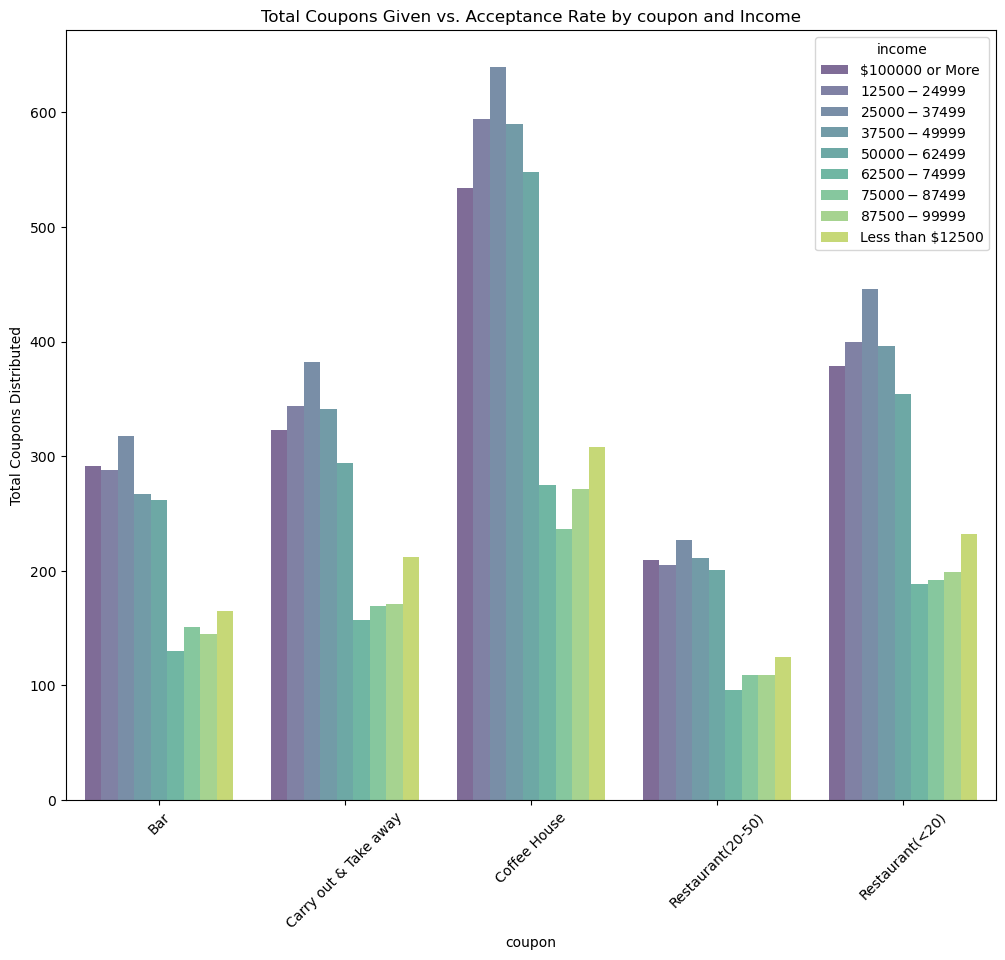

In [232]:
#Total number of people received a coupon.

# Group data by coupon type and income, and calculate acceptance rate
grouped_data = data.groupby(["coupon", "income"])["Y"].agg(["count", "mean"]).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 10))

# Create a bar chart for total coupon distribution
sns.barplot(x="coupon", y="count", hue="income", data=grouped_data, ax=ax1, palette="viridis", alpha=0.7)
ax1.set_ylabel("Total Coupons Distributed")

plt.title("Total Coupons Given vs. Acceptance Rate by coupon and Income")
plt.xticks(rotation=45)
plt.savefig("images/Total_coupons_income_coupontype.png")
plt.show()



### Coupon acceptance based on above plot ###
- Coffee house has more coupons accepted.
- Second top Restaurant who accepted coupons in Restaurant less than 20.
- Restaurant20-50 is considered expensive which has least coupons.
- People whose income is 31250 range used more coupons than others.
- Surprisinly, income range 100,000 used more coupons than income range 50k-90k.
  